# Contrôle du lockin (HF2LI Zürich Instruments)

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
import zhinst.core
daq = zhinst.core.ziDAQServer("localhost", 8005, 1)

In [3]:
# Vérifie la connexion au device
device_id = "dev712" 
c = daq.connectDevice(device_id, "1gbe")
c or "Ok" 

'Ok'

## Récupération des quadratures $X$ et $Y$ point par point

In [4]:
channel = 1
sample_path = f"/{device_id}/demods/{channel}/sample"
Npts = 10
X = np.zeros(Npts)
Y = np.zeros(Npts)
for i in range(Npts):
    # Do something...
    time.sleep(0.1)
    # Acquire data
    data = daq.getSample(sample_path)
    X[i] = data['x'][0]
    Y[i] = data['y'][0]

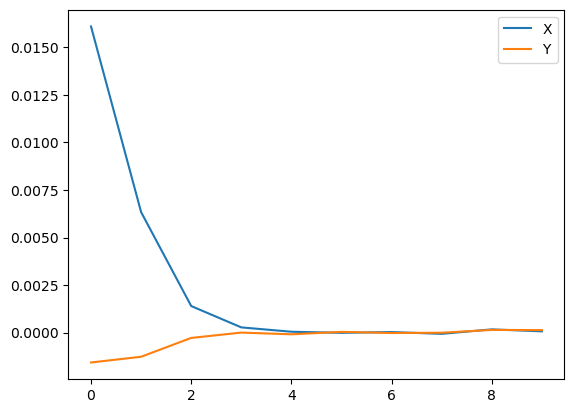

In [5]:
plt.plot(X,label='X')
plt.plot(Y,label='Y')
plt.legend()

## Récupération d'une trace temporelle

In [6]:
channel = 1
sample_path = f"/{device_id}/demods/{channel}/sample"
daq.subscribe(sample_path)
data = daq.poll(0.1, 100, 0, True)
X = data[sample_path]['x']
Y = data[sample_path]['y']
daq.unsubscribe(sample_path)

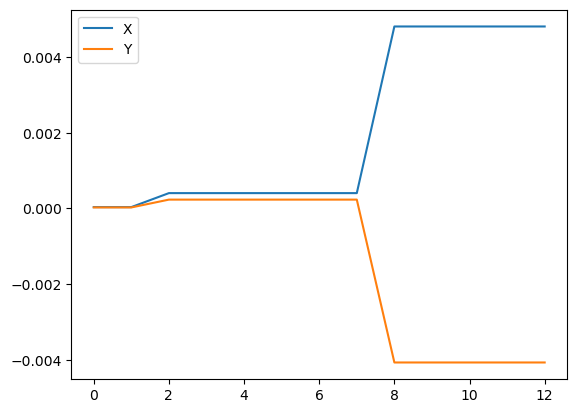

In [7]:
plt.plot(X,label='X')
plt.plot(Y,label='Y')
plt.legend()